# Example notebook for the ATOM pipeline
---------------------------------

Download the abalone dataset from https://archive.ics.uci.edu/ml/datasets/Abalone.  
  
**Description:** Predict the age of abalone shells from physical measurements.

<<=============== ATOM ===============>>
Algorithm task: regression.


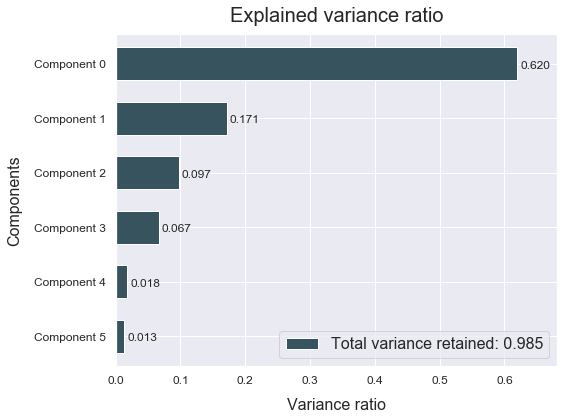

In [4]:
# Import packages
import pandas as pd
from atom import ATOMRegressor

# Load the abalone dataset
X = pd.read_csv('../abalone.csv')
atom = ATOMRegressor(X, y="Rings", percentage=10, warnings=False, verbose=1, random_state=42)

# Encode categorical features
atom.encode()

# Apply PCA for dimensionality reduction
atom.feature_selection(strategy="pca", max_features=6)
atom.plot_PCA(figsize=(8, 6), filename='atom_PCA_plot')

In [5]:
# Let's compare tree-based models using a successive halving approach
atom.pipeline(['tree', 'bag', 'et', 'rf', 'gbm', 'lgb'],
              successive_halving=True,
              metric='neg_mean_squared_error',
              max_iter=5,
              init_points=5,
              cv=1,
              bagging=5)


Running pipeline =================>
Metric: neg_mean_squared_error


<<=============== Iteration 0 ==============>>
Models in pipeline: Tree, Bag, ET, RF, GBM, LGB


Processing: 100%|████████████████████████████████| 6/6 [00:25<00:00,  4.18s/it]




Final results ================>>
Duration: 25.079s
Metric: neg_mean_squared_error
--------------------------------
Decision Tree             --> -9.479 ± 0.667 !! ~
Bagging Regressor         --> -11.409 ± 2.167 ~
Extra-Trees               --> -11.788 ± 1.270 ~
Random Forest             --> -11.441 ± 1.059 ~
Gradient Boosting Machine --> -11.044 ± 2.575 ~
LightGBM                  --> -12.929 ± 3.211 ~


<<=============== Iteration 1 ==============>>
Models in pipeline: Tree, Bag, GBM


Processing: 100%|████████████████████████████████| 3/3 [00:12<00:00,  4.03s/it]




Final results ================>>
Duration: 37.229s
Metric: neg_mean_squared_error
--------------------------------
Decision Tree             --> -11.110 ± 5.487 ~
Bagging Regressor         --> -6.780 ± 1.605 !! ~
Gradient Boosting Machine --> -8.079 ± 0.545 ~


<<=============== Iteration 2 ==============>>
Model in pipeline: Bag


Processing: 100%|████████████████████████████████| 1/1 [00:10<00:00, 10.36s/it]



Final results ================>>
Duration: 47.619s
Metric: neg_mean_squared_error
--------------------------------
Bagging Regressor --> -4.925 ± 0.403 ~


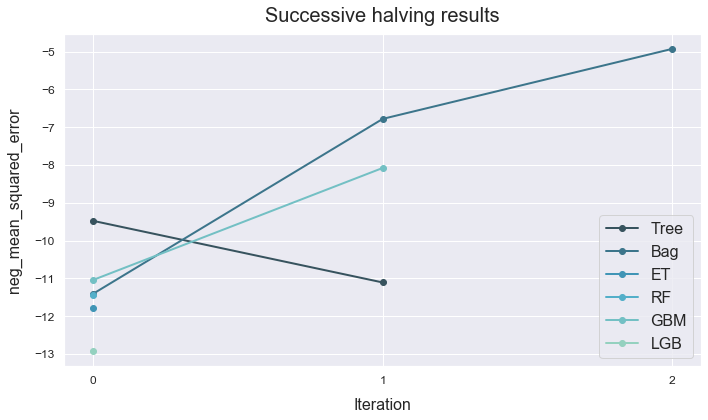

In [6]:
# Plot successive halving results
atom.plot_successive_halving()